# Importing the Packages

In [1]:
#------------------------------
# SOURCE:
#        Peek into US used car sales
#        https://www.kaggle.com/code/tsaustin/peek-into-us-used-car-sales/notebook
#------------------------------

import pandas as pd
import os
import sys
# Visualizing transaction distribution
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    # nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    print("nGraphRow=", nGraphRow)
    #exit()
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    # df = df.dropna('columns') # drop columns with NaN
    df = df.dropna() # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    # df = df.dropna('columns')
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
          

In [5]:
# used_car_sales_filename = sys.argv[1]
used_car_sales_filename = 'used_car_sales.csv'
print("used_car_sales_filename=", used_car_sales_filename)

used_car_sales_filename= used_car_sales.csv


In [6]:
# zip_codes_filename = sys.argv[2]
zip_codes_filename = 'ZIP-COUNTY-FIPS_2017-06.csv'
print("zip_codes_filename=", zip_codes_filename)

zip_codes_filename= ZIP-COUNTY-FIPS_2017-06.csv


In [7]:
df = pd.read_csv(used_car_sales_filename, dtype={'zipcode': str})
print("df=", df)
print("df.head()=", df.head())


df=             ID  pricesold  yearsold zipcode  Mileage               Make  \
0       137178       7500      2020   786**    84430               Ford   
1        96705      15000      2019   81006        0  Replica/Kit Makes   
2       119660       8750      2020   33449    55000             Jaguar   
3        80773      11600      2019   07852    97200               Ford   
4        64287      44000      2019   07728    40703            Porsche   
...        ...        ...       ...     ...      ...                ...   
122139   14948       4200      2019   80233   102700               Ford   
122140   58814       6500      2019   53132   128000               Ford   
122141    2156       2000      2019   77536    50000               Ford   
122142   29096       2280      2019   92131   164337                BMW   
122143   52391       5000      2019   18951   163111             Nissan   

                     Model  Year           Trim                   Engine  \
0                  

In [8]:
zip_codes = pd.read_csv(zip_codes_filename, dtype=str)
print("zip_codes=", zip_codes)
print("zip_codes.head()=", zip_codes.head())

zip_codes=          ZIP         COUNTYNAME STATE STCOUNTYFP CLASSFP
0      36003     Autauga County    AL      01001      H1
1      36006     Autauga County    AL      01001      H1
2      36067     Autauga County    AL      01001      H1
3      36066     Autauga County    AL      01001      H1
4      36703     Autauga County    AL      01001      H1
...      ...                ...   ...        ...     ...
52884  00850   St. Croix Island    VI      78010      H4
52885  00840   St. Croix Island    VI      78010      H4
52886  00820   St. Croix Island    VI      78010      H4
52887  00830    St. John Island    VI      78020      H4
52888  00802  St. Thomas Island    VI      78030      H4

[52889 rows x 5 columns]
zip_codes.head()=      ZIP      COUNTYNAME STATE STCOUNTYFP CLASSFP
0  36003  Autauga County    AL      01001      H1
1  36006  Autauga County    AL      01001      H1
2  36067  Autauga County    AL      01001      H1
3  36066  Autauga County    AL      01001      H1
4  36703  A

In [9]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in df')
nRow, nCol = zip_codes.shape
print(f'There are {nRow} rows and {nCol} columns in zip_codes')


There are 122144 rows and 13 columns in df
There are 52889 rows and 5 columns in zip_codes


In [10]:
# CLEAN ZIP CODES
df = df[df['zipcode'].str.isdigit() == True]
# df['zipcode'] = df['zipcode'].astype(int)
print("df.shape=", df.shape)

df.shape= (82495, 13)


nGraphRow= 1


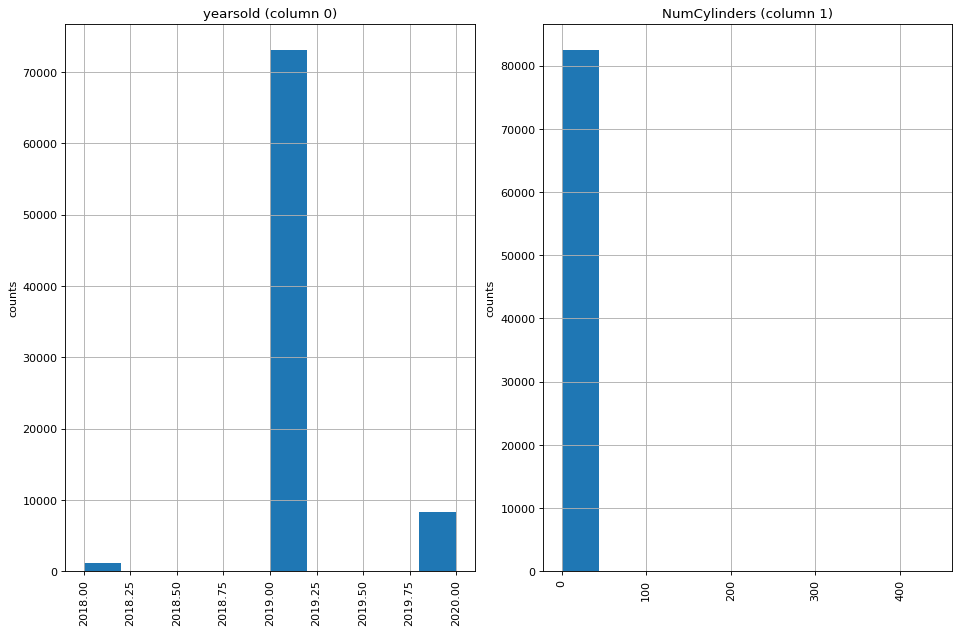

In [11]:
# Distribution graphs (histogram/bar graph) of sampled columns: WORKED
plotPerColumnDistribution(df, 10, 5)


In [13]:
# Correlation matrix: DID NOT WORK
# plotCorrelationMatrix(df, 8)


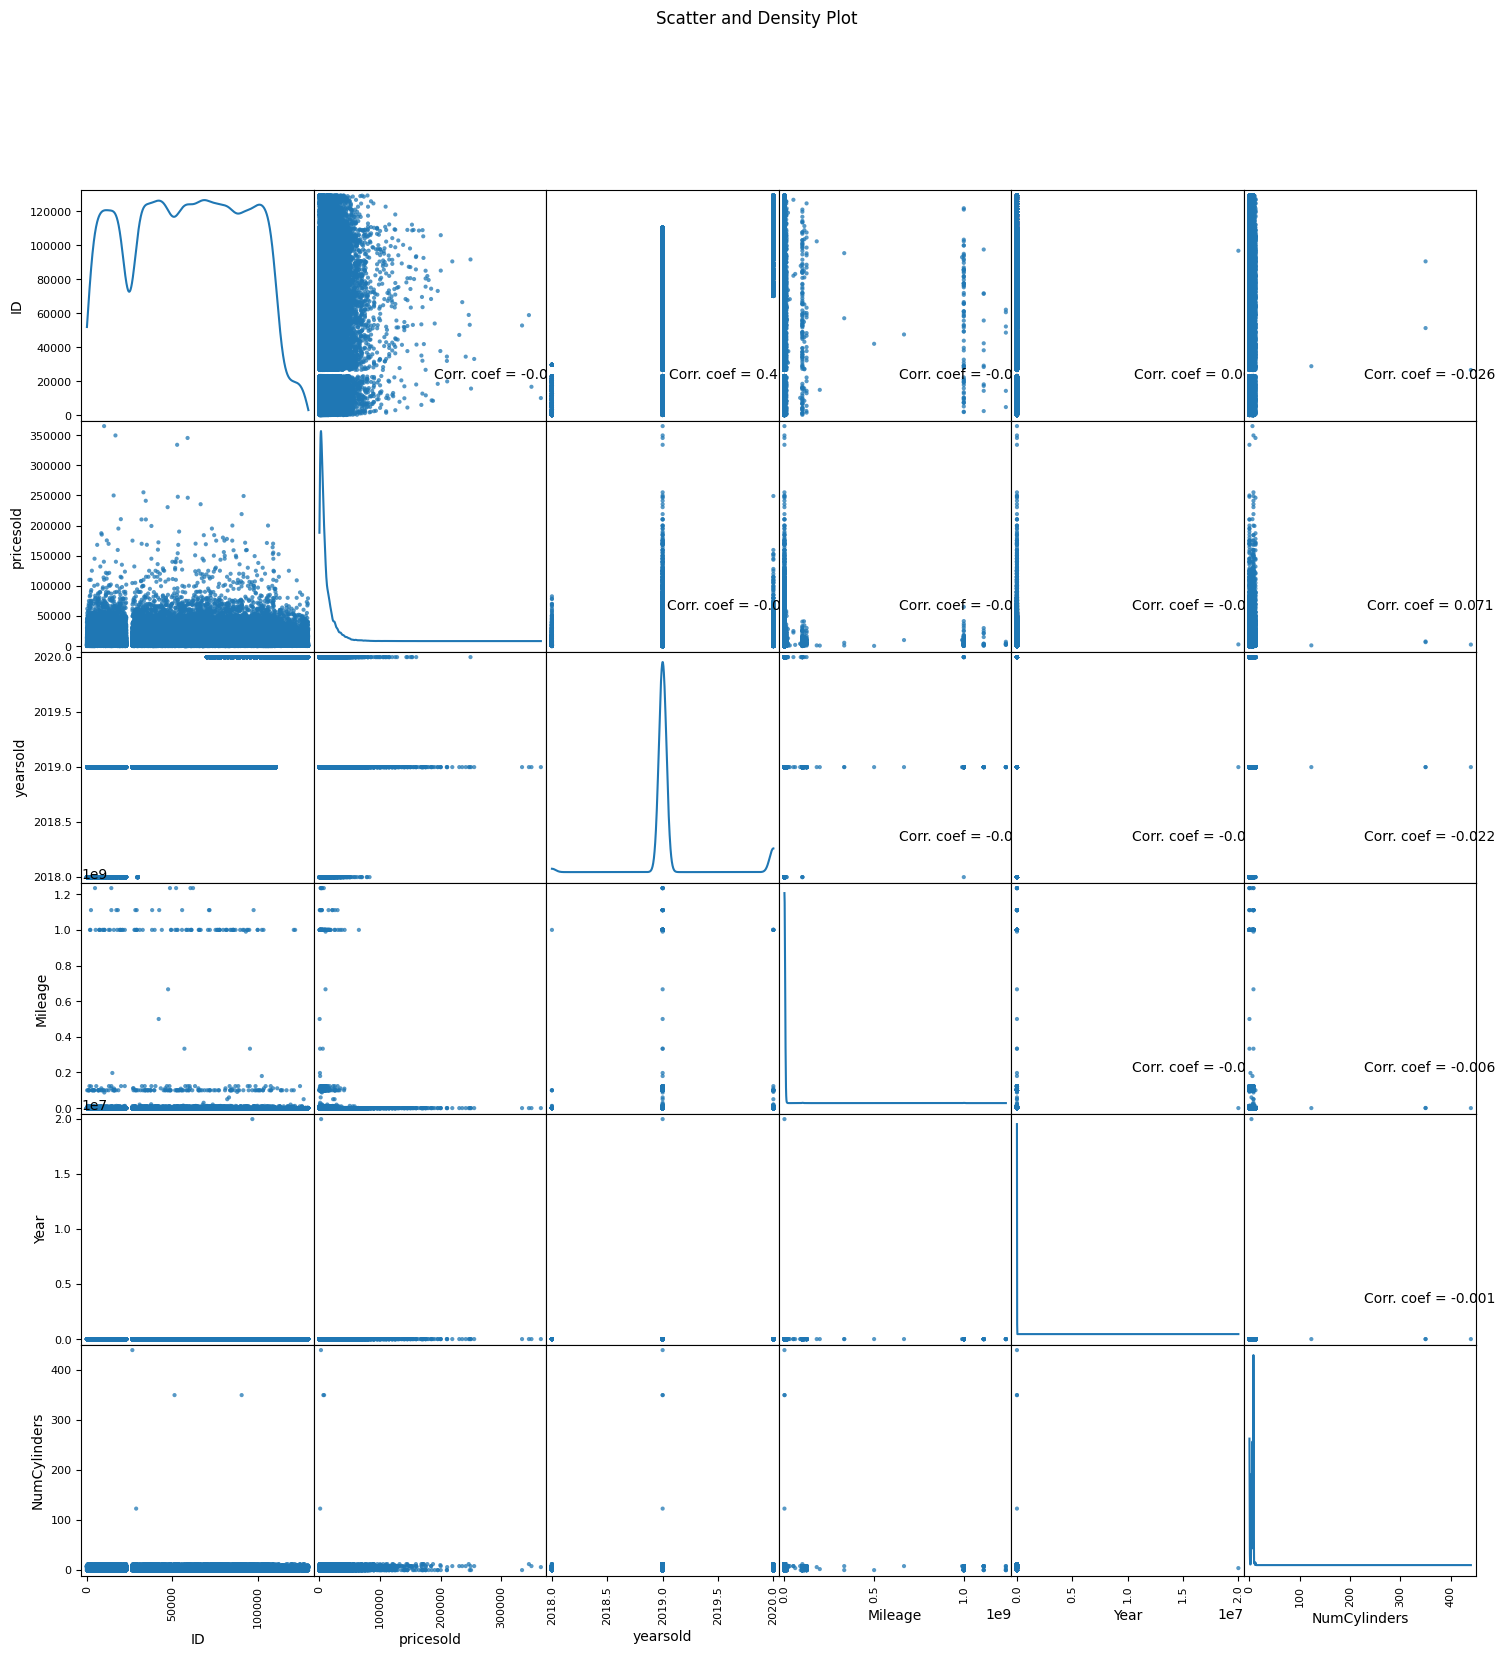

In [16]:
# Scatter and density plots: WORKED
plotScatterMatrix(df, 18, 10)

In [17]:
# CLEAN ZIP CODES:
# For our purpose we only need zip code and state. 
# If we would only copy these columns we would end 
# with duplicates which would duplicate sales data 
# later when we join the two dataframes. To be safe 
# let's create a unique zip,state dataframe.
#
zip_codes_clean = zip_codes.groupby(by=['ZIP','STATE'], as_index=False).first()[['ZIP','STATE']]
print("zip_codes_clean=", zip_codes_clean)
print("zip_codes_clean.head()=", zip_codes_clean.head())
zip_codes_clean

zip_codes_clean=          ZIP STATE
0      00501    NY
1      00601    PR
2      00602    PR
3      00603    PR
4      00604    PR
...      ...   ...
39451  99925    AK
39452  99926    AK
39453  99927    AK
39454  99928    AK
39455  99929    AK

[39456 rows x 2 columns]
zip_codes_clean.head()=      ZIP STATE
0  00501    NY
1  00601    PR
2  00602    PR
3  00603    PR
4  00604    PR


In [18]:
# Adding some features: Age of the car
# Adding some features that don't come with the 
# dataset but are helpful for visualization and 
# building models on top of the dataset.
df['Age'] = df['yearsold'] - df['Year']
print("df.head()=", df.head())

df.head()=        ID  pricesold  yearsold zipcode  Mileage               Make  \
1   96705      15000      2019   81006        0  Replica/Kit Makes   
2  119660       8750      2020   33449    55000             Jaguar   
3   80773      11600      2019   07852    97200               Ford   
4   64287      44000      2019   07728    40703            Porsche   
7    5250      70000      2019   07627     6500         Land Rover   

                Model  Year           Trim                      Engine  \
1  Jaguar Beck Lister  1958            NaN           383 Fuel injected   
2                 XJS  1995  2+2 Cabriolet     4.0L In-Line 6 Cylinder   
3             Mustang  1968          Stock              289 cu. in. V8   
4                 911  2002     Turbo X-50                        3.6L   
7            Defender  1997            NaN  4.0 Liter Fuel Injected V8   

      BodyType  NumCylinders DriveType  Age  
1  Convertible             8       RWD   61  
2  Convertible             6   

In [19]:
# US States from ZIP Code
# for this to work we need to clean up the zip codes 
# in the sales dataframe first by removing non numeric 
# zip codes and convert the column type to integer. 
# DID NOT DO IT: 
#   I'm converting the zip codes to integer because the 
#   zip data frames stores them as such (i hope there are no 
#    issues with the leading zeroes in the US zip codes)

df = df[df['zipcode'].str.isdigit() == True]
# df['zipcode'] = df['zipcode'].astype(int)
print("df.shape=", df.shape)


df.shape= (82495, 14)


In [20]:
# Check for duplicates of ZIP CODES
df = pd.merge(df, zip_codes_clean, left_on='zipcode', right_on='ZIP', how='left')
df.drop('ZIP',axis=1,inplace=True)
print("df.shape=", df.shape)


df.shape= (82495, 15)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


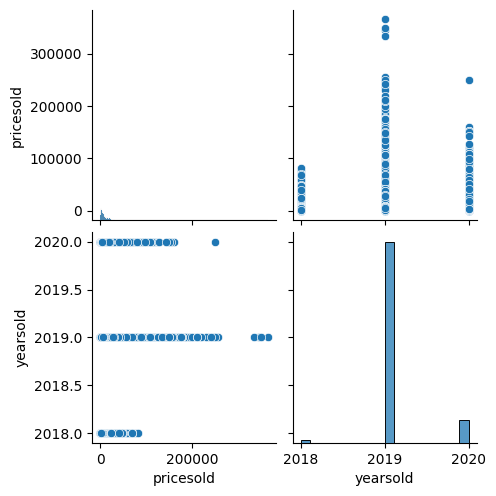

In [21]:
# Select specific columns for the pairplot
subset = df[['pricesold', 'yearsold', 'zipcode']]
# Create the pairplot
#sns.set(style="whitegrid")
sns.pairplot(subset)
#sns.pairplot(df)
plt.show()

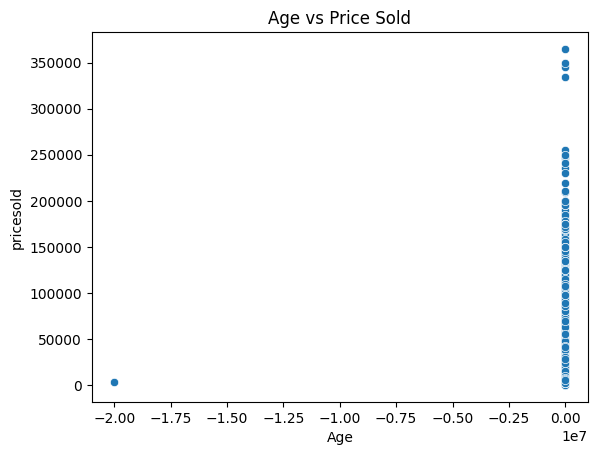

In [22]:
# Selling price by Age
# Let's take a look how the age/price scatter plot looks like
# Scatter plot of 'Age' vs 'pricesold'
sns.scatterplot(x='Age', y='pricesold', data=df)
plt.title('Age vs Price Sold')
plt.xlabel('Age')
plt.ylabel('pricesold')
plt.show()


In [23]:
# There's some outliers, most likely due to a 
# wrong Model year in the data set. Let's clean this up
print("df[df['Age']>100]=", df[df['Age']>100])
# [87 rows x 15 columns]


df[df['Age']>100]=           ID  pricesold  yearsold zipcode  Mileage               Make  \
1144   27419       1640      2019   60048        0  Predator GSXR 750   
1665   19387       2030      2019   60178        0  Replica/Kit Makes   
2218   22167      10000      2019   36093    64000         Mitsubishi   
2300   53677       3050      2019   92596        0           VW/OTHER   
2455   58688       5210      2019   14472    99100                BMW   
...      ...        ...       ...     ...      ...                ...   
79888  47832      55000      2019   04760     1824        Other Makes   
80958  12817       6000      2019   53157     1200  Replica/Kit Makes   
81348  71504       5300      2019   37617    99999         Studebaker   
82373  40319       5200      2019   72601    89250             Lancia   
82478  91065      10000      2019   15851      100                REO   

             Model  Year         Trim                   Engine     BodyType  \
1144      Predator  1900 

In [24]:
# Drop rows where Age > 100
df = df[df['Age'] <= 100]
# Optionally reset index
df.reset_index(drop=True, inplace=True)
df

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Age,STATE
0,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD,61,CO
1,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD,25,FL
2,80773,11600,2019,07852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD,51,NJ
3,64287,44000,2019,07728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD,17,NJ
4,5250,70000,2019,07627,6500,Land Rover,Defender,1997,NaN,4.0 Liter Fuel Injected V8,NaN,0,4WD,22,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82403,14948,4200,2019,80233,102700,Ford,Mustang,1977,NaN,302,Fastback,8,NaN,42,CO
82404,58814,6500,2019,53132,128000,Ford,E-Series Van,2012,NaN,E-150,NaN,0,NaN,7,WI
82405,2156,2000,2019,77536,50000,Ford,Bronco,1978,NaN,351m,NaN,8,4WD,41,TX
82406,29096,2280,2019,92131,164337,BMW,3-Series,2000,328ci,M52TU 2.8L,Coupe,6,RWD,19,CA


In [25]:
# Fix the samples that used YY instead of YYYY. 
# The list above showed only 19xx cars. So you'll 
# need to change the code below if you'll see cars 
# that clearly where built in the 2000s.
df = df[df['Year']>0]
df.loc[df['Year']<100,['Year']] += 1900
# And recalculate the Age column again
df['Age'] = df['yearsold'] - df['Year']

print("df=", df)
print("df.shape=", df.shape)
print("df.head()=", df.head())

df=            ID  pricesold  yearsold zipcode  Mileage               Make  \
0       96705      15000      2019   81006        0  Replica/Kit Makes   
1      119660       8750      2020   33449    55000             Jaguar   
2       80773      11600      2019   07852    97200               Ford   
3       64287      44000      2019   07728    40703            Porsche   
4        5250      70000      2019   07627     6500         Land Rover   
...       ...        ...       ...     ...      ...                ...   
82403   14948       4200      2019   80233   102700               Ford   
82404   58814       6500      2019   53132   128000               Ford   
82405    2156       2000      2019   77536    50000               Ford   
82406   29096       2280      2019   92131   164337                BMW   
82407   52391       5000      2019   18951   163111             Nissan   

                    Model  Year           Trim                      Engine  \
0      Jaguar Beck Lister  19

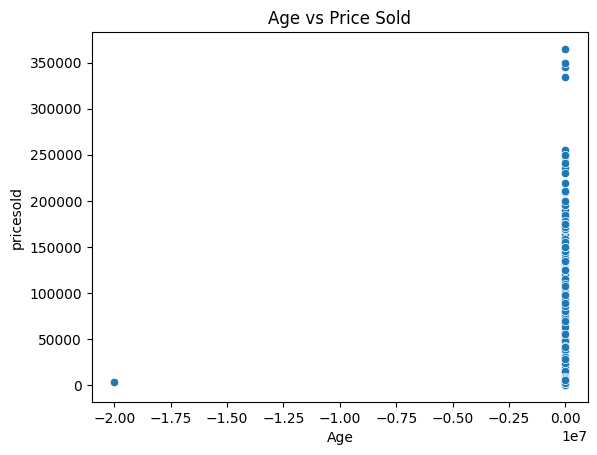

In [26]:
# Let's do the scatterplot again
sns.scatterplot(x='Age', y='pricesold', data=df)
plt.title('Age vs Price Sold')
plt.xlabel('Age')
plt.ylabel('pricesold')
plt.show()


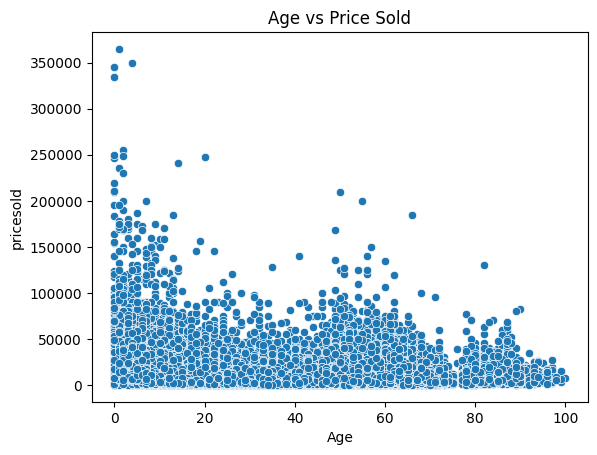

In [27]:
# cars with a negative age? there's some
# next year models and typos. For now I just delete them
df = df[df['Age']>=0]
sns.scatterplot(x='Age', y='pricesold', data=df)
plt.title('Age vs Price Sold')
plt.xlabel('Age')
plt.ylabel('pricesold')
plt.show()


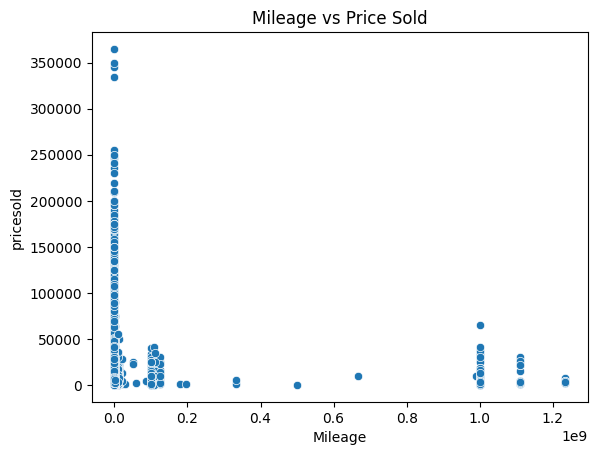

In [28]:
# Selling price by miles
sns.scatterplot(x='Mileage', y='pricesold', data=df)
plt.title('Mileage vs Price Sold')
plt.xlabel('Mileage')
plt.ylabel('pricesold')
plt.show()


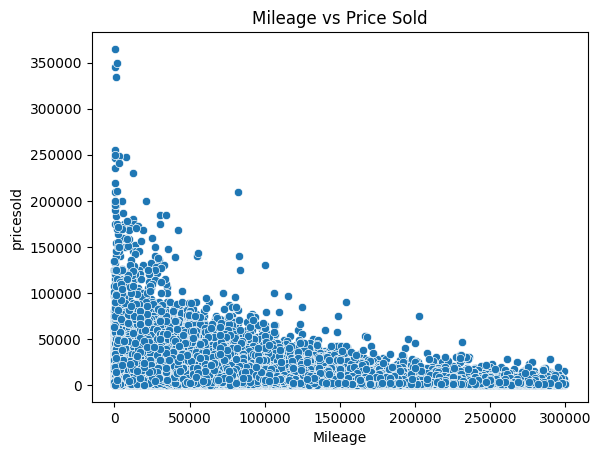

In [29]:
# CLEAN Data by  Mileage
df = df[(df['Mileage']<300000) & (df['Mileage']>0)]
sns.scatterplot(x='Mileage', y='pricesold', data=df)
plt.title('Mileage vs Price Sold')
plt.xlabel('Mileage')
plt.ylabel('pricesold')
plt.show()

/var/folders/kp/dx00j7wj3gnbx0m6qtqq8qz00000gs/T/ipykernel_4794/2948904351.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumCylinders'],kde=False,bins=20)


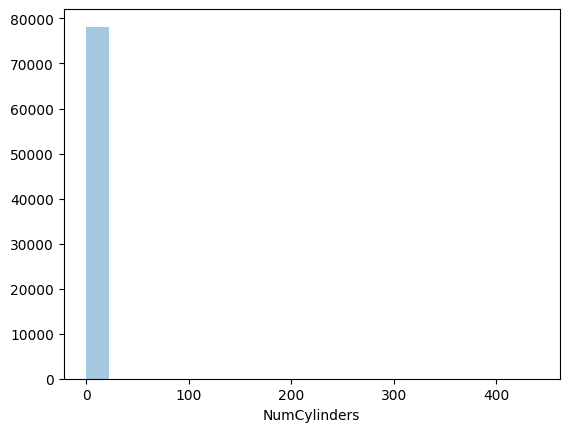

df[df['NumCylinders'] > 16]=           ID  pricesold  yearsold zipcode  Mileage       Make          Model  \
34064  51234       6500      2019   24112    60703  Chevrolet        Caprice   
36894  26567       2520      2019   60110    66000      Dodge  Other Pickups   
39104  28786       1200      2019   56554    90343  Chevrolet  Other Pickups   

       Year Trim Engine BodyType  NumCylinders DriveType  Age STATE  
34064  1976  NaN     V8    Coupe           350       RWD   43    VA  
36894  1974  van   none      van           440       RWD   45    IL  
39104  1954  NaN    NaN      NaN           123       RWD   65    MN  


In [30]:
# LOOK AT NumCylinders
sns.distplot(df['NumCylinders'],kde=False,bins=20)
plt.show()
# ==> ok - yeah there's something off. In commercial vehicles 
# 16 cylinders are max. Let's print the outliers here.
print("df[df['NumCylinders'] > 16]=", df[df['NumCylinders'] > 16])

/var/folders/kp/dx00j7wj3gnbx0m6qtqq8qz00000gs/T/ipykernel_4794/3096895694.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumCylinders'],kde=False,bins=16)


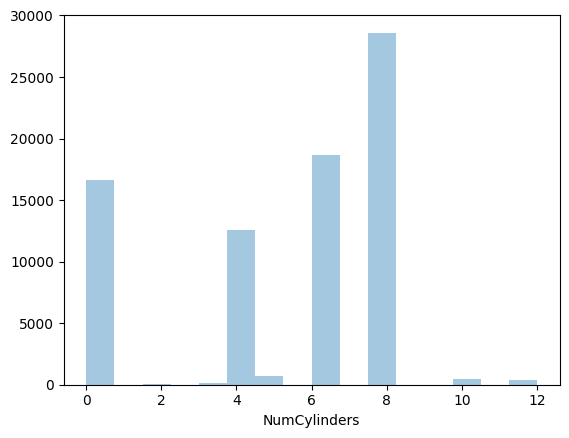

In [31]:
#Just a few above 16. I'll just delete them.

df = df[df['NumCylinders'] <= 16]
#And do the histogram again.
sns.distplot(df['NumCylinders'],kde=False,bins=16)
plt.show()


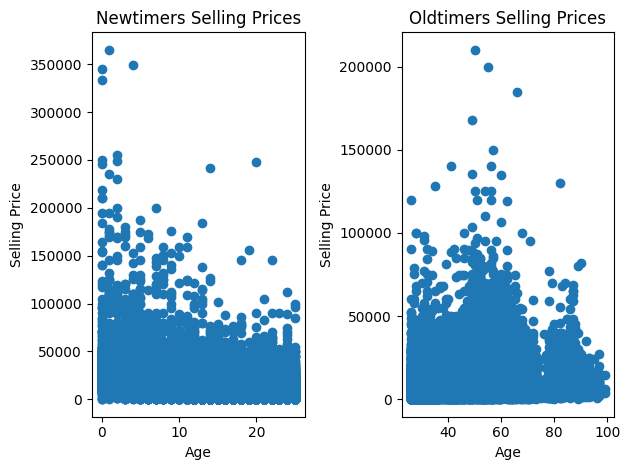

In [32]:
# Splitting dataset into Oldtimers and Newtimers
# I think it makes sense to split the dataset into two. 
#   * Historical cars (age >25 years) and 
#   * Normal cars that are younger than 25 years
#
# Let's take a look at the age/selling price distribution side by side

oldtimers = df[df['Age'] > 25]
newtimers = df[df['Age'] <= 25]
#
plt.subplot(1, 2, 1)
plt.scatter(newtimers['Age'],newtimers['pricesold'])
plt.ylabel('Selling Price')
plt.xlabel('Age')
plt.title('Newtimers Selling Prices')
plt.subplot(1, 2, 2)
plt.scatter(oldtimers['Age'],oldtimers['pricesold'])
plt.ylabel('Selling Price')
plt.xlabel('Age')
plt.title('Oldtimers Selling Prices')
plt.tight_layout()
plt.show()

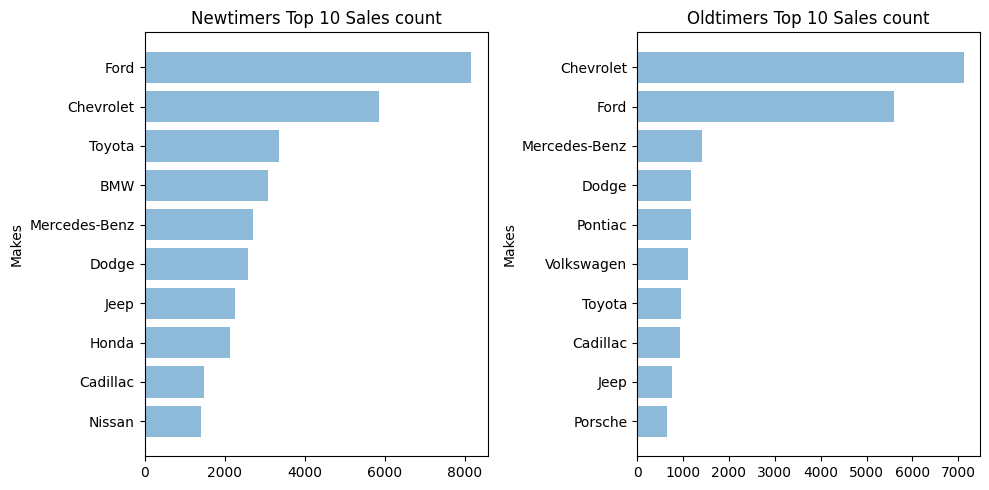

In [33]:
#---------------------------
# More Visualizations
# Sales by Car Makes
# What's the Car Make breakdown in both groups?
#----------------------------
plt.rcParams["figure.figsize"] = [10,5]
plt.subplot(1, 2, 1)
makes = newtimers['Make'].value_counts(ascending=True).tail(10).index
y_pos = np.arange(len(makes))
salescount = newtimers['Make'].value_counts(ascending=True).tail(10).values 
plt.barh(y_pos, salescount, align='center', alpha=0.5)
plt.yticks(y_pos, makes)
plt.ylabel('Makes')
plt.title('Newtimers Top 10 Sales count')
plt.subplot(1, 2, 2)
makes = oldtimers['Make'].value_counts(ascending=True).tail(10).index
y_pos = np.arange(len(makes))
salescount = oldtimers['Make'].value_counts(ascending=True).tail(10).values 
plt.barh(y_pos, salescount, align='center', alpha=0.5)
plt.yticks(y_pos, makes)
plt.ylabel('Makes')
plt.title('Oldtimers Top 10 Sales count')
plt.tight_layout()
plt.show()

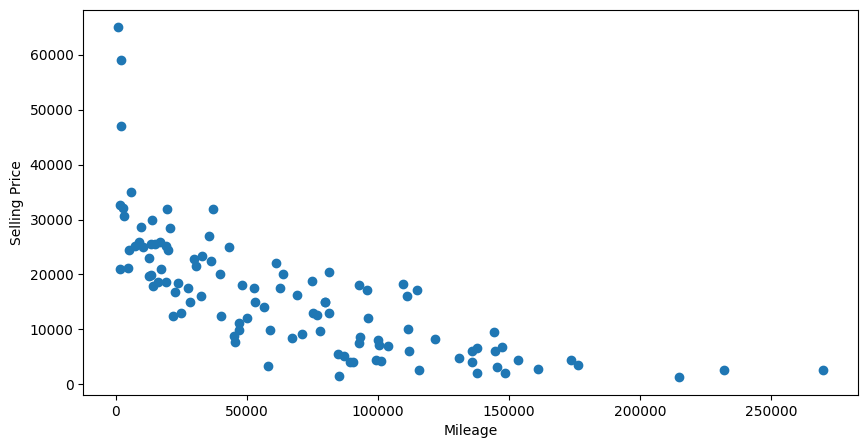

In [34]:
#----------------------------------------
# Analysis on a specific model
# Let's focus on newtimers and one of 
# the top selling models, the 2007 Ford Mustang.
#----------------------------------------
newtimers.groupby(by=['Make','Model','Year']).size().sort_values(ascending=False).head()
mileage = newtimers[(newtimers['Make'] == 'Ford') 
          & (newtimers['Model'] == 'Mustang') 
          & (newtimers['Year'] == 2007)]['Mileage']
salesprices = newtimers[(newtimers['Make'] == 'Ford') 
          & (newtimers['Model'] == 'Mustang') 
          & (newtimers['Year'] == 2007)]['pricesold']
plt.scatter(mileage,salesprices)
plt.ylabel('Selling Price')
plt.xlabel('Mileage')
plt.show()


In [3]:
!pip install --upgrade nbformat
!pip install plotly

#--------------------
# Sales by Region
#
# pip install --upgrade nbformat
#--------------------
states = df['STATE'].value_counts().index
salescount = df['STATE'].value_counts().values
#
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#
init_notebook_mode(connected=True)

data = [ dict(
        type='choropleth',
        locations = states,
        z = salescount, 
        locationmode = 'USA-states',
        colorbar = dict(
            title = "Salescount")
        ) ]

layout = dict(
    title = 'US used car sales by states',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa')
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')


  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.0
    Uninstalling nbformat-5.9.0:
      Successfully uninstalled nbformat-5.9.0


NameError: name 'df' is not defined